In [114]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

#### Exercise 5.2.1

Let $\overline{X_n}$ denote the mean of a random sample of size $n$ from a distribution that is $N(\mu,\sigma^2)$. Find the limiting distribution of $\overline{X_n}$.


While this has solution in Prof. Wikens's document, we can see that (as shown in https://math.stackexchange.com/a/4222402/145325) the sample mean is going to be $\mu$ but sample stadard deviation reduces with $n$ as it is $\sigma/n$ for $\overline{X_n}$. So in the limit, the distribution ends up converging to that of a degenerate random variable $X=\mu$.



#### Exercise 5.2.2. 

Let $Y_1$ denote the minimum of a random sample of size $n$ from a distribution that has pdf $f(x) = e^{−(x−\theta)}, \theta < x < \infty,$ zero elsewhere. Let $Z_n = n(Y_1 − \theta)$. Investigate the limiting distribution of $Z_n$.

Solution is given in the solutions manual and in Prof. Wilken's document as well

#### Exercise 5.2.3. 

Let $Y_n$ denote the maximum of a random sample of size $n$ from a distribution of the continuous type that has cdf $F(x)$ and pdf $f(x) = F′(x)$. Find the limiting distribution of $Z_n = n[1 − F (Y_n )].$

Solution is in https://math.stackexchange.com/a/2020828/145325

#### Exercise 5.2.4. 

Let $Y_2$ denote the second smallest item of a random sample of size $n$ from a distribution of the continuous type that has cdf $F(x)$ and pdf $f(x) = F′(x)$. Find the limiting distribution of $W_n = nF(Y_2)$.

In the newer editions, they ask for limiting distribution of $W_n = nF(Y_3)$. Solution is in the solutions manual, and for the newer version, the solution is very similar with the limiting distribution being a $\Gamma(3,1)$ distribution.

#### Exercise 5.2.5. 

Let the pmf of $Y_n$ be $p_n(y) = 1, y = n,$ zero elsewhere. Show that $Y_n$ does not have a limiting distribution. (In this case, the probability has “escaped” to infinity.)

Solution is given in the solutions manual and in Prof. Wilken's document as well

#### Exercise 5.2.6. 

Let $X_1, X_2, . . . , X_n$ be a random sample of size $n$ from a distribution that is $N(\mu,\sigma^2)$, where $\sigma^2 > 0$. Show that the sum $Z_n = \sum\limits_{i=1}^n X_i$ does not have a limiting distribution.

Solution is in https://math.stackexchange.com/a/4483326/145325 but a better solution is in https://edoras.sdsu.edu/~babailey/reut09/lecture13.pdf (Example 4, page 13). The cdf ends up having a limit that is constant which cannot be a cdf.

#### Exercise 5.2.7. 

Let $X_n$ have a gamma distribution with parameter $\alpha = n$ and $\beta$, where $\beta$ is not a function of n. Let $Y_n = X_n/n$. Find the limiting distribution of $Y_n$.

Solution is in solutions manual

#### Exercise 5.2.8. 

Let $Z_n$ be $\chi^2(n)$ and let $W_n = Z_n/n^2$. Find the limiting distribution of $W_n$.

Again another problem with use of MGF. Solutions are given in 

https://math.stackexchange.com/q/3406125/145325

and 

https://stats.stackexchange.com/q/80055/183497

#### Exercise 5.2.9. 

Let $X$ be $\chi^2(50)$. Using the limiting distribution discussed in Example $5.2.7$, approximate $P (40 < X < 60)$. Compare your answer with that calculated by R.

It took a while for me to realize that he meant "***Example*** 5.2.7" and not "***Exercise*** 5.2.7"

So from "***Example*** 5.2.7", if $X$ is $\chi^2(50)$, then $(X-50)/\sqrt{2\times50}$ is *approximately* $N(0,1)$. We need $$\begin{align}P(40 < X < 60)&=P(-10 < X-50 < 10) \\ &=P(-1 < (X-50)/\sqrt{2\times50} < 1) \end{align}.$$ $X$ is $\chi^2(50)$, a continuous distribution so that $P(-1 < (X-50)/10 < 1) = P((X-50)/10 \leq 60)-P((X-50)/10 \leq 40)$.

Usual notation for the cdf of $N(0,1)$ is $F(x) = P(X \leq x) = \Phi(x)$. As $(X-50)/10$ has a distribution of $N(0,1)$, the desired answer, which is an approximation, is $\Phi(1)-\Phi(-1)$, which matches the answer in the solutions manual.

In [115]:
norm.cdf(1,loc=0,scale=1)-norm.cdf(-1,loc=0,scale=1)

0.6826894921370859

In [116]:
chi2.cdf(60,50,loc=0,scale=1)-chi2.cdf(40,50,loc=0,scale=1)

0.6859853509353708

Amazingly close!!

#### Exercise 5.2.10. 

Modify the R function *cdistplt* to show histograms of the values $w_n$ discussed in Example $5.2.8$.

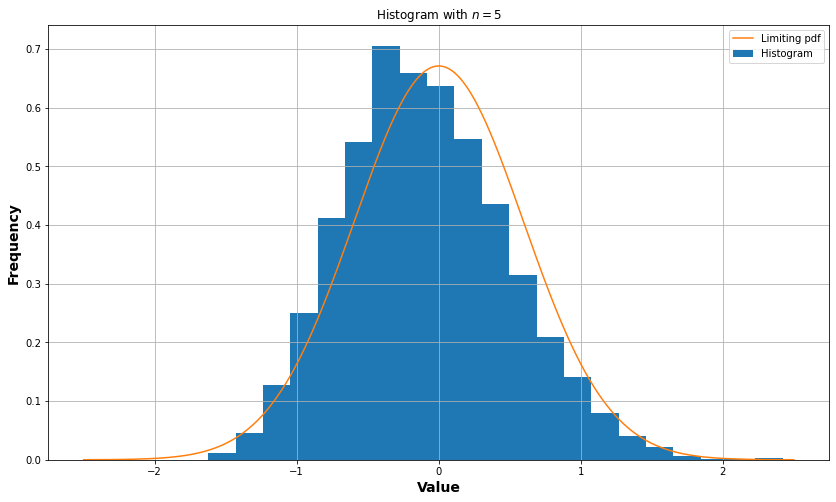

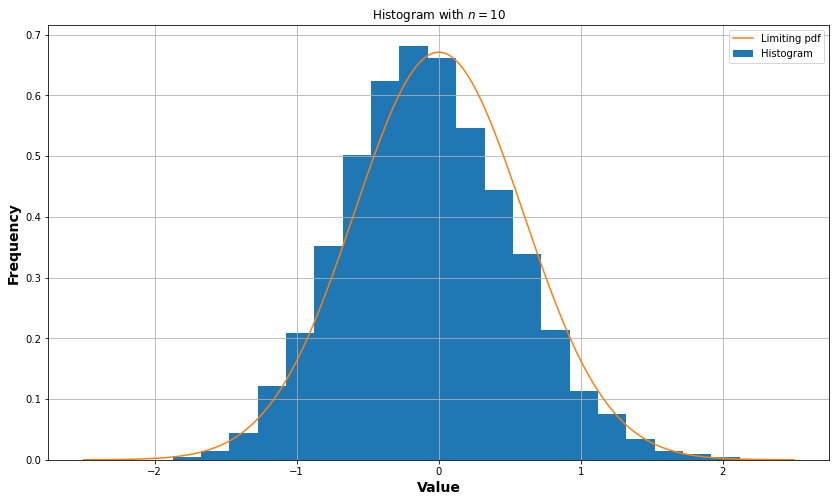

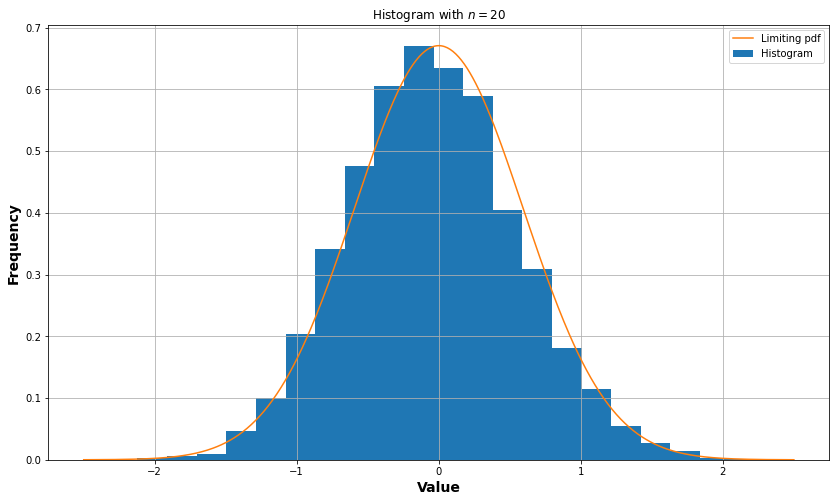

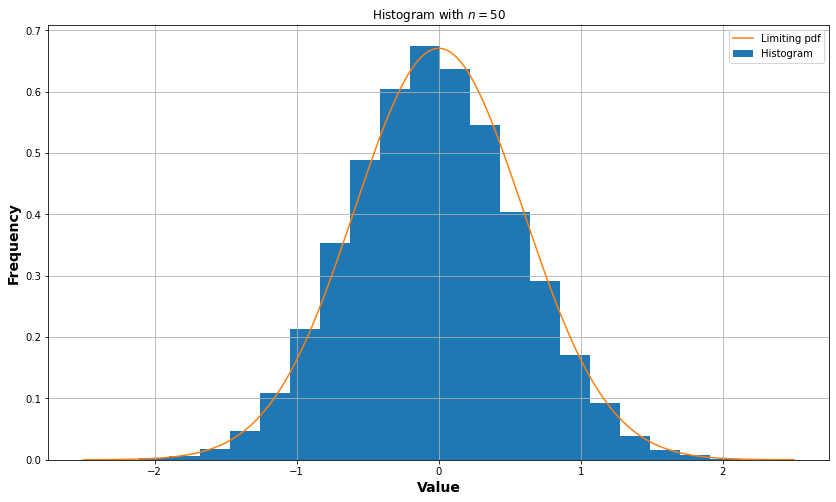

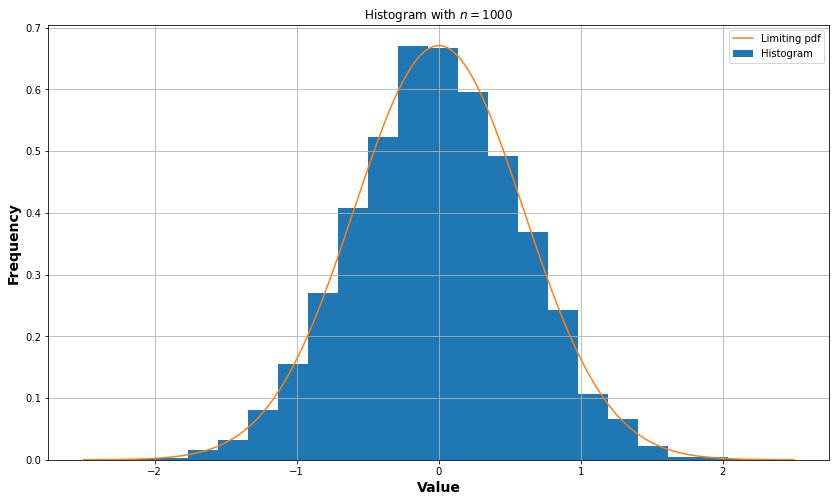

In [117]:
sizes = [5,10,20,50,1000]
for i in sizes:
    
    z = chi2.rvs(i, loc=0, scale=1, size=10000, random_state=None)
    w = [np.sqrt(x/np.sqrt(2)/i) for x in z]
    y = [np.sqrt(i)*(xw-1/np.sqrt(np.sqrt(2))) for xw in w]
#     y = [(np.sqrt(zi)-np.sqrt(i))/np.sqrt(np.sqrt(2)) for zi in z]
    plt.figure(figsize = (14,8))
    plt.hist(y,bins=21,density=True)
    
    xn = [j/100 for j in range(-250,251)]
    estn = norm.pdf(xn,loc=0,scale=1/np.sqrt(np.sqrt(8)))
    
    plt.plot(xn,estn)
    plt.grid()
    plt.ylabel('Frequency',fontsize=14,fontweight='bold')
    plt.xlabel('Value',fontsize=14,fontweight='bold')
    plt.title('Histogram with $n=$'+str(i))
    plt.legend(['Limiting pdf','Histogram'])
    plt.show()
    

**Note:** When they say $N(0,2^{(-3/2)})$, they are saying that $\sigma^2 = 2^{(-3/2)})$ but in python, the scale factor represents $\sigma$ so we need to put in $2^{(-3/4)})$ in norm.pdf function for the "scale" parameter.

#### Exercise 5.2.11. 

Let $p = 0.95$ be the probability that a man, in a certain age group, lives at least $5$ years.

(a) If we are to observe $60$ such men and if we assume independence, use R to compute the probability that at least $56$ of them live $5$ or more years.

(b) Find an approximation to the result of part (a) by using the Poisson distribution.
Hint: Redefine $p$ to be $0.05$ and $1 − p = 0.95.$

In [118]:
# (a)

n=60
p=0.95

print(1-binom.cdf(55,n,p,loc=0),binom.cdf(4,n,1-p,loc=0))

0.8196649438072179 0.8196649438072179


In [119]:
binom.pmf(56,n,p,loc=0)+binom.pmf(57,n,p,loc=0)+binom.pmf(58,n,p,loc=0)+binom.pmf(59,n,p,loc=0)+binom.pmf(60,n,p,loc=0)

0.8196649438072424

In [120]:
# (b)

mu=n*(1-p)
poisson.cdf(4,mu)

0.8152632445237715

#### Exercise 5.2.12. 

Let the random variable $Z_n$ have a Poisson distribution with parameter $\mu = n$. Show that the limiting distribution of the random variable $Y_n = (Z_n −n)/\sqrt{n}$ is normal with mean zero and variance $1$.

Solution is in the solutions manual, and also in the University of Denver's Math $361$ assignment solution document (included in this folder) whose link is given below (problem number 5).
https://cs.du.edu/~paulhorn/361/assn11-solns.pdf

#### Exercise 5.2.13. 

Prove Theorem 5.2.3.


#### Theorem 5.2.3. 

Suppose $X_n$ converges to $X$ in distribution and $Y_n$ converges in probability to $0$. Then $X_n + Y_n$ converges to $X$ in distribution.

The outline to the solution is in https://math.stackexchange.com/q/3406231/145325 but the proof by Prof. Wilkens (U of Hawaii faculty, whose solutions to selected problems of Section $5.2$ is in this folder) is more detailed.

In the text, it was extremely misleading when the authors say "The proof is similar to that of ***Theorem*** $5.2.2$ and is left to Exercise $5.2.13.$" The proof is actually similar to that of ***Theorem*** $5.2.1$ where the tactic of splitting the probability into two parts works like a charm.

#### Exercise 5.2.14. 

Let $X_n$ and $Y_n$ have a bivariate normal distribution with parameters $\mu_1, \mu_2, \sigma_1^2,\sigma_2^2$ (free of $n$) but $\rho = 1−1/n$. Consider the conditional distribution of $Y_n$, given $X_n = x$. Investigate the limit of this conditional distribution as $n \to \infty$. What is the limiting distribution if $\rho = −1 + 1/n$? Reference to these facts is made in the remark of Section $2.5$.

Once more, a misleading reference. This is just a direct application of Equation $(3.5.26)$ where it is shown that the conditional distribution has the density $$N \left[ \mu_2 +\rho \frac{\sigma_2}{\sigma_1}(x−\mu_1),\sigma_2^2(1−\rho^2)\right].$$ Letting $\rho \to 1$ from the left, we get that the distribution approaches a degenerate distribution given by $$\lim_{n \to \infty} \left\{Y_n|(X_n=x)\right\} \xrightarrow{D} \mu_2 +\rho \frac{\sigma_2}{\sigma_1}(x−\mu_1).$$

Solutions to the rest of the problems are in Tomoki Okuno's website -- https://tomoki-okuno.com/files/math/Ch5_sol.pdf except for the last one

#### Exercise 5.2.21. 

Consider Stirling’s formula $(5.2.2)$:

(a) Run the following R code to check this formuala for $k = 5$ to $k = 15$. 

(b) Take the log of Stirling’s formula and compare it with the R computation lgamma(k+1).

(c) Use Stirling’s formula to show that the first limit in Example $5.2.3$ is $1$.

In [121]:
# (a)

ks = 5
kstp = 15
col1 = pd.DataFrame(columns = ['J','Ks','Kstp'])

for j in range(ks, kstp+1):
    i=j-ks
    c1 = math.gamma(j+1)
    c2 = math.sqrt(2*math.pi)*math.exp(-j+(j+0.5)*math.log(j))
    col1.loc[i]=[j,c1,c2]
col1.head()

,J,Ks,Kstp
0,5.0,120.0,118.019168
1,6.0,720.0,710.078185
2,7.0,5040.0,4980.395832
3,8.0,40320.0,39902.395453
4,9.0,362880.0,359536.872842


In [122]:
# (b)

col1['CompareIdeal'] = None

for i in range(len(col1)):
    j = col1['J'].iloc[i]
    c2 = col1['Kstp'].iloc[i]
    col1['CompareIdeal'].iloc[i] = math.lgamma(j+1)/np.log(c2)

col1.head()

,J,Ks,Kstp,CompareIdeal
0,5.0,120.0,118.019168,1.003489
1,6.0,720.0,710.078185,1.002114
2,7.0,5040.0,4980.395832,1.001397
3,8.0,40320.0,39902.395453,1.000983
4,9.0,362880.0,359536.872842,1.000724


Stirling's forumula is given by $$\Gamma(k + 1) \approx \sqrt{2 \pi}k^{(k+1/2)}e^{−k}$$

So we have

$$ \begin{align}
\lim_{n \to \infty}\frac{\Gamma[(n+1)/2]}{\sqrt{n\pi}\Gamma(n/2)} &= \lim_{n \to \infty}\frac{1}{\sqrt{n\pi}}\cfrac{\sqrt{2 \pi}(\frac{n+1}{2})^{(n/2+1/2+1/2)}e^{−(n+1)/2}}{\sqrt{2 \pi}(\frac{n}{2})^{(n/2+1/2)}e^{−n/2}}
\\ &= \lim_{n \to \infty} \frac{e^{-1/2}}{\sqrt{n\pi}} \left(\frac{n+1}{n}\right)^{(n+1)/2}\sqrt{\frac{n+1}{2}}
\\ &= \frac{1}{\sqrt{2\pi}}
\end{align}
$$